In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# 2024년 1월 서울시민으,ㅣ 바라는 점
seoul1 = open('/content/gdrive/My Drive/seoul1.txt', encoding='utf-8').read()
seoul2 = open('/content/gdrive/My Drive/seoul2.txt', encoding='utf-8').read()

In [3]:
import re

In [4]:
seoul1 = re.sub('[^가-힣]',' ',seoul1)
seoul2 = re.sub('[^가-힣]',' ',seoul2)

In [5]:
stop_word = ['서울','서울시','시장님','생각','시장','시행','경우','문제']
for word in stop_word:
  seoul1 = re.sub(word," ",seoul1)
  seoul2 = re.sub(word," ",seoul2)
list = seoul1+ seoul2

In [6]:
# 한국어 형태소 분석을 위한 konlpy 설치
# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [7]:
import konlpy

In [ ]:
# 형태소 분석을 위한 한나눔 객체 생성
hannanum = konlpy.tag.Hannanum()
# 한나눔 객체를 통해 연설문에서 명사만 추출하기
nouns=['']
for a in list:
  nouns += hannanum.nouns(a)
nouns
0E

In [9]:
df_word = pd.DataFrame({
    'word': nouns
})

In [10]:
df_word

,word
0,
1,안녕
2,올해
3,월
4,여의
...,...
1949,교통열악
1950,대책
1951,호
1952,연장


In [11]:
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count>=2')
df_word

,word,count
1,안녕,2
2,올해,2
4,여의,2
5,선착장,3
6,리버버스,4
...,...,...
1948,주민들,3
1949,교통열악,4
1950,대책,2
1952,연장,2


In [12]:
df_word = df_word.groupby('word').agg(n=('word','count')).sort_values('n',ascending=False)
df_word

,n
word,
부대시설,13
이용,12
복리시설,11
주민들,10
사업,10
...,...
빙둘러싼,1
사료되오니,1
사무실,1


In [13]:
top20 = df_word.head(20)
top20

,n
word,
부대시설,13
이용,12
복리시설,11
주민들,10
사업,10
장애,10
정책,9
설치,9
노선,9


In [ ]:
dic_word = df_word.to_dict()['n']
dic_word

In [15]:
from wordcloud import WordCloud
font = "/content/gdrive/My Drive/DoHyeon-Regular.ttf"

In [16]:
wc = WordCloud(font_path=font,width=400,height=400,background_color='white')
img_wordcloud = wc.generate_from_frequencies(dic_word)


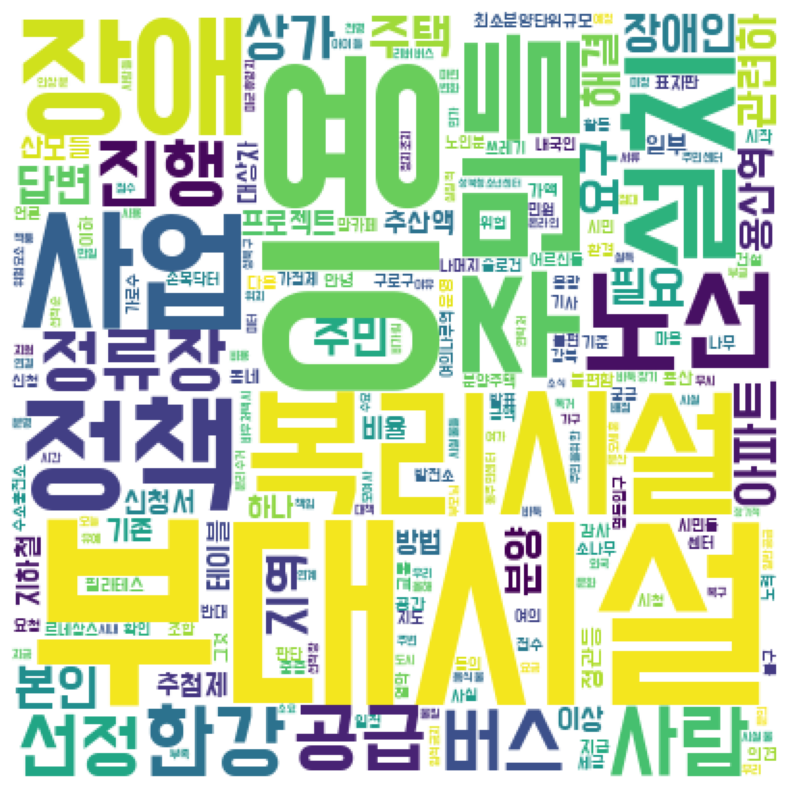

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)